<a href="https://colab.research.google.com/github/hanzalarohan123/Bootstrap/blob/master/AI_Lab_04_Hanzal.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<h1>Classification</h1>

Mounting the drive

In [1]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


Libraries

In [2]:
import os
import pandas as pd
import math
import matplotlib.pyplot as plt
import seaborn as sns #Visualization
from sklearn.linear_model import LinearRegression

Accessing the contents of the drive


In [3]:
%cd /content/gdrive/My Drive/

/content/gdrive/My Drive


In [4]:
!ls

 Book1.csv		 lab3pdf.pdf
 Book1.csv.xlsx		 LAB3.rar
 Book1.xlsx		'Lab_3_Task_1 (1).ipynb'
 cert			 lab4.rar
 Classroom		 loan_data_set.csv
'Colab Notebooks'	'Muhammad Hanzala Qureshi SP18-BCSC-0068  (1).docx'
'Copy of diabetes.csv'	'Muhammad Hanzala Qureshi SP18-BCSC-0068 .docx'
 diabetes.csv		 Multivariate_regression_data.csv
'Getting started.pdf'	'Registers in 8086.gslides'
 Good-EQ.pdf		'Screenshot 2020-11-12 112244.png'
 insurance.csv		'Screenshot from 2020-10-15 19-08-38.png'
 kaggle			'Screenshot from 2020-10-15 19-08-44.png'
 Kaggle			'Semester 6'
 lab123.asm.gdoc	'Task2.ipynb - Colaboratory.pdf'
 LAB3.gdoc		 TASM
 LAB3.odt		 Untitled7.ipynb


Import data set from kaggle

In [ ]:
import os
os.environ['KAGGLE_CONFIG_DIR'] = "/content/gdrive/My Drive/kaggle"

In [5]:
%cd /content/gdrive/My Drive/Kaggle

/content/gdrive/My Drive/Kaggle


In [ ]:
!kaggle datasets download -d burak3ergun/loan-data-set

Traceback (most recent call last):
  File "/usr/local/bin/kaggle", line 5, in <module>
    from kaggle.cli import main
  File "/usr/local/lib/python2.7/dist-packages/kaggle/__init__.py", line 23, in <module>
    api.authenticate()
  File "/usr/local/lib/python2.7/dist-packages/kaggle/api/kaggle_api_extended.py", line 146, in authenticate
    self.config_file, self.config_dir))
IOError: Could not find kaggle.json. Make sure it's located in /content/gdrive/My Drive/kaggle. Or use the environment method.


In [6]:
!ls

diabetes.csv  kaggle.json


In [ ]:
!unzip \loan-data-set.zip  && rm loan-data-set.zip

unzip:  cannot find or open loan-data-set.zip, loan-data-set.zip.zip or loan-data-set.zip.ZIP.


In [ ]:
!ls

diabetes.csv  kaggle.json


Reading data set

In [7]:
df_class = pd.read_csv('diabetes.csv')
print('\nNumber of rows and columns in the data set: ',df_class.shape)
print('')


Number of rows and columns in the data set:  (768, 9)



In [8]:
print(df_class.head())

   Pregnancies  Glucose  BloodPressure  ...  DiabetesPedigreeFunction  Age  Outcome
0            6      148             72  ...                     0.627   50        1
1            1       85             66  ...                     0.351   31        0
2            8      183             64  ...                     0.672   32        1
3            1       89             66  ...                     0.167   21        0
4            0      137             40  ...                     2.288   33        1

[5 rows x 9 columns]


Check the features will null using heat map

Text(0.5, 1.0, 'Missing value in the dataset')

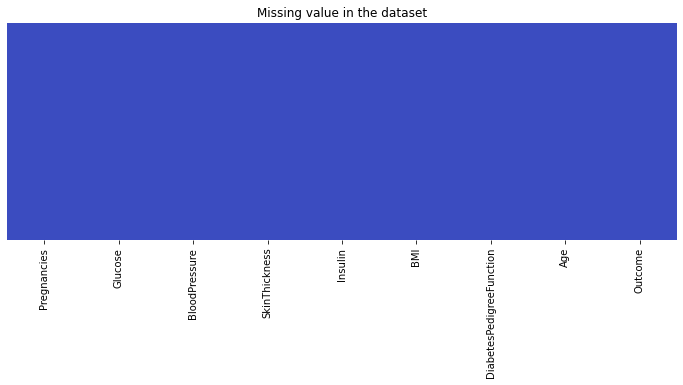

In [9]:
plt.figure(figsize=(12,4))
sns.heatmap(df_class.isnull(),cbar=False,cmap='coolwarm',yticklabels=False)
plt.title('Missing value in the dataset')

Find the sum of null values in each feature/column

In [10]:
df_class.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [11]:
print(df_class.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB
None


In [12]:
df_class.nunique()

Pregnancies                  17
Glucose                     136
BloodPressure                47
SkinThickness                51
Insulin                     186
BMI                         248
DiabetesPedigreeFunction    517
Age                          52
Outcome                       2
dtype: int64

In [13]:
df_class.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [ ]:
# Scaling for Numerical data set
#from sklearn.preprocessing import StandardScaler
#sc=StandardScaler()
#data_numerical.iloc[:,1:] =sc.fit_transform(data_numerical.iloc[:,1:])  

/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:1734: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value[:, i].tolist())


In [ ]:
# Lets verify the dummay variable process
print('Columns in original data frame:\n',df_class.columns.values) #original dataframe column names
print('\nNumber of rows and columns in the dataset:',df_class.shape) #previous dataframe shape
#print('\nColumns in data frame after encoding dummy variable:\n',df_Loan.columns.values) #original dataframe column names
#print('\nNumber of rows and columns in the dataset:',df_Loan.shape) #updated data frame shape

Columns in original data frame:
 ['Pregnancies' 'Glucose' 'BloodPressure' 'SkinThickness' 'Insulin' 'BMI'
 'DiabetesPedigreeFunction' 'Age' 'Outcome']

Number of rows and columns in the dataset: (768, 9)


Distributing data in **training and testing**


In [16]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test =train_test_split(df_class.drop(['Outcome'],axis=1),df_class.Outcome,test_size=0.30,random_state=0)# chane zero to 20,10

Importing SVM and creating the model

In [17]:
from sklearn.svm import SVC
svc_model=SVC()

<h1>SUPPORT VECTOR CLASSIFIER</h1>
Creating the **SVM model** and run prediction on testing data

In [18]:
svc_model.fit(X_train,y_train)
svm_pred=svc_model.predict(X_test)


Importing **evaluation** libraries

In [19]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

**Confusion matrix** and **Accuracy** score

In [20]:

cm=confusion_matrix(y_test,svm_pred)
print(cm)

from sklearn.metrics import accuracy_score
print(accuracy_score(y_test,svm_pred))

[[142  15]
 [ 42  32]]
0.7532467532467533


In [21]:
print("SVM  -> ",accuracy_score(y_test,svm_pred)*100)

SVM  ->  75.32467532467533


**Classification Report**

In [22]:
print(confusion_matrix(y_test,svm_pred))
print(classification_report(y_test,svm_pred))
print(accuracy_score(y_test, svm_pred))

[[142  15]
 [ 42  32]]
              precision    recall  f1-score   support

           0       0.77      0.90      0.83       157
           1       0.68      0.43      0.53        74

    accuracy                           0.75       231
   macro avg       0.73      0.67      0.68       231
weighted avg       0.74      0.75      0.74       231

0.7532467532467533


<h1>Naive Bayes</h1>

In [23]:
from sklearn import naive_bayes
Naive = naive_bayes.GaussianNB()

In [24]:
# fit the training dataset on the NB classifier
Naive.fit(X_train,y_train)# predict the labels on validation dataset
predictions_NB= Naive.predict(X_test)# Use accuracy_score function to get the accuracy
print("Naive Bayes Accuracy Score -> ",accuracy_score(predictions_NB, y_test)*100)

Naive Bayes Accuracy Score ->  76.19047619047619


In [25]:
print(confusion_matrix(y_test,predictions_NB))
print(classification_report(y_test,predictions_NB))
print(accuracy_score(y_test,predictions_NB))

[[138  19]
 [ 36  38]]
              precision    recall  f1-score   support

           0       0.79      0.88      0.83       157
           1       0.67      0.51      0.58        74

    accuracy                           0.76       231
   macro avg       0.73      0.70      0.71       231
weighted avg       0.75      0.76      0.75       231

0.7619047619047619


<h1>K-nearest Neighbour<h1>

In [26]:
from sklearn.neighbors import KNeighborsClassifier

In [27]:
knn = KNeighborsClassifier(n_neighbors=3)

In [28]:
knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                     weights='uniform')

In [29]:
knn_pred = knn.predict(X_test)

In [30]:
print("Accuracy:",accuracy_score(y_test, knn_pred))

Accuracy: 0.6926406926406926


In [31]:
print(confusion_matrix(y_test,knn_pred))
print(classification_report(y_test,knn_pred))
print(accuracy_score(y_test,knn_pred))
print('erroe')

print(1-accuracy_score(y_test,knn_pred))

[[123  34]
 [ 37  37]]
              precision    recall  f1-score   support

           0       0.77      0.78      0.78       157
           1       0.52      0.50      0.51        74

    accuracy                           0.69       231
   macro avg       0.64      0.64      0.64       231
weighted avg       0.69      0.69      0.69       231

0.6926406926406926
erroe
0.3073593073593074


Try KNN model with different number of K and perform evaluation.

<h1> Decision Tree <h1>

In [32]:
from sklearn.tree import DecisionTreeClassifier

In [33]:
dtc = DecisionTreeClassifier()

In [34]:
# Train Decision Tree Classifer
dtc.fit(X_train,y_train)

#Predict the response for test dataset
dtc_pred = dtc.predict(X_test)

In [35]:
print(confusion_matrix(y_test,dtc_pred))
print(classification_report(y_test,dtc_pred))
print(accuracy_score(y_test,dtc_pred))

[[127  30]
 [ 27  47]]
              precision    recall  f1-score   support

           0       0.82      0.81      0.82       157
           1       0.61      0.64      0.62        74

    accuracy                           0.75       231
   macro avg       0.72      0.72      0.72       231
weighted avg       0.76      0.75      0.75       231

0.7532467532467533


<H1> ENSEMBLE <H1>

<h2> Simple Average Approach</h2>

In [67]:
averaged_preds = (svm_pred + predictions_NB + dtc_pred+knn_pred)//3
acc = accuracy_score(y_test, averaged_preds)
print(acc)
print('error')
print(1-acc)

0.7748917748917749
error
0.22510822510822515


In [40]:
from sklearn.ensemble import RandomForestClassifier, VotingClassifier

<h3>Stacking</h3>

<h2>Voting Classifier</h2>

In [41]:
voting_clf = VotingClassifier(estimators=[('SVC', SVC()), ('DTree', dtc), ('NaiveBayes', Naive),('KNN',knn)], voting='hard')
voting_clf.fit(X_train, y_train)



VotingClassifier(estimators=[('SVC',
                              SVC(C=1.0, break_ties=False, cache_size=200,
                                  class_weight=None, coef0=0.0,
                                  decision_function_shape='ovr', degree=3,
                                  gamma='scale', kernel='rbf', max_iter=-1,
                                  probability=False, random_state=None,
                                  shrinking=True, tol=0.001, verbose=False)),
                             ('DTree',
                              DecisionTreeClassifier(ccp_alpha=0.0,
                                                     class_weight=None,
                                                     criterion='gini',
                                                     max_dept...
                                                     min_weight_fraction_leaf=0.0,
                                                     presort='deprecated',
                                                  

In [42]:
preds = voting_clf.predict(X_test)

In [43]:
print(confusion_matrix(y_test,preds))
print(classification_report(y_test,preds))
print(accuracy_score(y_test,preds))
print('error')
print(1-accuracy_score(y_test,preds))

[[144  13]
 [ 40  34]]
              precision    recall  f1-score   support

           0       0.78      0.92      0.84       157
           1       0.72      0.46      0.56        74

    accuracy                           0.77       231
   macro avg       0.75      0.69      0.70       231
weighted avg       0.76      0.77      0.75       231

0.7705627705627706
error
0.22943722943722944


<h3>Bagging</h3>

<h2> Random Forest Classifier</h2>

In [44]:
random_forest = RandomForestClassifier(n_estimators=10, random_state=12)

In [45]:
random_forest.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=12, verbose=0,
                       warm_start=False)

In [46]:
rf=random_forest.predict(X_test)

In [47]:
print(confusion_matrix(y_test,rf))
print(classification_report(y_test,rf))
print(accuracy_score(y_test,rf))
print('error')
print(1-accuracy_score(y_test,rf))

[[142  15]
 [ 43  31]]
              precision    recall  f1-score   support

           0       0.77      0.90      0.83       157
           1       0.67      0.42      0.52        74

    accuracy                           0.75       231
   macro avg       0.72      0.66      0.67       231
weighted avg       0.74      0.75      0.73       231

0.7489177489177489
error
0.25108225108225113


In [48]:
from sklearn.model_selection import KFold
#kf=KFold(n_splits=5,shuffle=True)

In [49]:
kf=KFold(n_splits=10,shuffle=True)

In [50]:
data=df_class.drop(['Outcome'],axis=1)
print(data.head)

<bound method NDFrame.head of      Pregnancies  Glucose  BloodPressure  ...   BMI  DiabetesPedigreeFunction  Age
0              6      148             72  ...  33.6                     0.627   50
1              1       85             66  ...  26.6                     0.351   31
2              8      183             64  ...  23.3                     0.672   32
3              1       89             66  ...  28.1                     0.167   21
4              0      137             40  ...  43.1                     2.288   33
..           ...      ...            ...  ...   ...                       ...  ...
763           10      101             76  ...  32.9                     0.171   63
764            2      122             70  ...  36.8                     0.340   27
765            5      121             72  ...  26.2                     0.245   30
766            1      126             60  ...  30.1                     0.349   47
767            1       93             70  ...  30.4      

Text(0.5, 1.0, 'Missing value in the dataset')

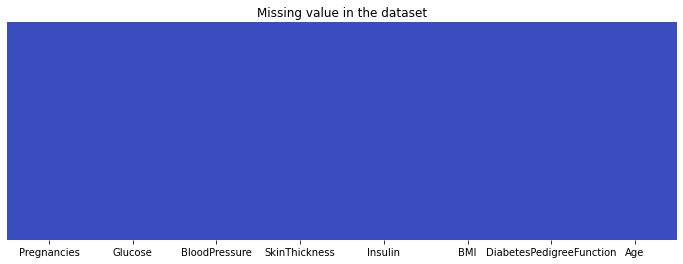

In [51]:
plt.figure(figsize=(12,4))
sns.heatmap(data.isnull(),cbar=False,cmap='coolwarm',yticklabels=False)
plt.title('Missing value in the dataset')

In [52]:
rf_k=RandomForestClassifier(n_estimators=10)

In [53]:
from sklearn.model_selection import cross_val_score
acc_rf=cross_val_score(rf_k,data,df_class.Outcome,scoring='accuracy',cv=10)

In [66]:
print(acc_rf.mean())
print('error')
print(1-(acc_rf.mean()))


0.7525632262474369
error
0.24743677375256312


In [88]:

array=[10,20,40,60,80,100]
for i in range(0,6):
  random_forest = RandomForestClassifier(n_estimators=array[i])
  random_forest.fit(X_train,y_train)
  rf_predict=random_forest.predict(X_test)
  print('Accuracy of Rain Forest when estimate is ',array[i], ' : ',accuracy_score(y_test,rf_predict))

Accuracy of Rain Forest when estimate is  10  :  0.7532467532467533
Accuracy of Rain Forest when estimate is  20  :  0.7619047619047619
Accuracy of Rain Forest when estimate is  40  :  0.7705627705627706
Accuracy of Rain Forest when estimate is  60  :  0.7619047619047619
Accuracy of Rain Forest when estimate is  80  :  0.7748917748917749
Accuracy of Rain Forest when estimate is  100  :  0.7792207792207793


<h3> Boosting</h3>

In [55]:
k_folds = KFold(n_splits=20,shuffle=True)

In [56]:
from sklearn.ensemble import AdaBoostClassifier
ada_boost = AdaBoostClassifier(n_estimators=10, random_state=12)

In [57]:
results = cross_val_score(ada_boost, X_train, y_train, cv=k_folds)

In [58]:
print(results.mean()*100)

72.22934472934472


In [59]:
ada_boost.fit(X_train,y_train)
ada_predict=ada_boost.predict(X_test)

In [60]:
print(confusion_matrix(y_test,ada_predict))
print(classification_report(y_test,ada_predict))
print(accuracy_score(y_test,ada_predict))
print('error')
print(1-accuracy_score(y_test,ada_predict))

[[139  18]
 [ 44  30]]
              precision    recall  f1-score   support

           0       0.76      0.89      0.82       157
           1       0.62      0.41      0.49        74

    accuracy                           0.73       231
   macro avg       0.69      0.65      0.65       231
weighted avg       0.72      0.73      0.71       231

0.7316017316017316
error
0.2683982683982684


In [69]:
array=[10,20,40,60,80,100]
for i in range(0,6):
  ada_boost = AdaBoostClassifier(n_estimators=array[i], random_state=12)
  ada_boost.fit(X_train,y_train)
  ada_predict=ada_boost.predict(X_test)
  print('Accuracy when estimate is ',array[i], ' : ',accuracy_score(y_test,ada_predict))

Accuracy when estimate is  10  :  0.7316017316017316
Accuracy when estimate is  20  :  0.7532467532467533
Accuracy when estimate is  40  :  0.7532467532467533
Accuracy when estimate is  60  :  0.7705627705627706
Accuracy when estimate is  80  :  0.7662337662337663
Accuracy when estimate is  100  :  0.7532467532467533
